In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
variants = pd.read_csv("variant_cases.csv", sep=",", index_col=0)
vaccinations = pd.read_csv("vaccinations.csv", sep=',', index_col=0)

In [3]:
variants = variants.loc[(variants['variant'] == 'B.1.617.2') | (variants['variant'] == 'B.1.1.529') |\
                       (variants['variant'] == 'B.1.1.7') | (variants['variant'] == 'B.1.351')]
#variants['variant_name'] = np.where(variants['variant'] == 'B.1.1.529', 'omicron', 'delta')
variants

,country_code,year_week,source,new_cases,number_sequenced,percent_cases_sequenced,valid_denominator,variant,number_detections_variant,number_sequenced_known_variant,percent_variant
country,,,,,,,,,,,
Austria,AT,2020-40,GISAID,5597,4,0.1,Yes,B.1.1.529,0,4.0,0.0
Austria,AT,2020-40,GISAID,5597,4,0.1,Yes,B.1.1.7,0,4.0,0.0
Austria,AT,2020-40,GISAID,5597,4,0.1,Yes,B.1.351,0,4.0,0.0
Austria,AT,2020-40,GISAID,5597,4,0.1,Yes,B.1.617.2,0,4.0,0.0
Austria,AT,2020-41,GISAID,7486,26,0.3,Yes,B.1.1.529,0,26.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
Sweden,SE,2021-50,TESSy,24538,1951,8.0,Yes,B.1.617.2,1340,1951.0,68.7
Sweden,SE,2021-51,TESSy,28046,32,0.1,Yes,B.1.1.529,28,32.0,87.5
Sweden,SE,2021-51,TESSy,28046,32,0.1,Yes,B.1.617.2,4,32.0,12.5


In [4]:
def get_variants(row):
    percentage = row['percent_variant']/100
    cases = row['new_cases'] * percentage
    return cases
    
variants['number_cases_ratio'] = variants.apply(get_variants, axis=1)
variants = variants.drop(columns=['source', 'number_sequenced', 'percent_cases_sequenced', 'valid_denominator',\
                                  'number_detections_variant', 'number_sequenced_known_variant'])
variants

,country_code,year_week,new_cases,variant,percent_variant,number_cases_ratio
country,,,,,,
Austria,AT,2020-40,5597,B.1.1.529,0.0,0.000
Austria,AT,2020-40,5597,B.1.1.7,0.0,0.000
Austria,AT,2020-40,5597,B.1.351,0.0,0.000
Austria,AT,2020-40,5597,B.1.617.2,0.0,0.000
Austria,AT,2020-41,7486,B.1.1.529,0.0,0.000
...,...,...,...,...,...,...
Sweden,SE,2021-50,24538,B.1.617.2,68.7,16857.606
Sweden,SE,2021-51,28046,B.1.1.529,87.5,24540.250
Sweden,SE,2021-51,28046,B.1.617.2,12.5,3505.750


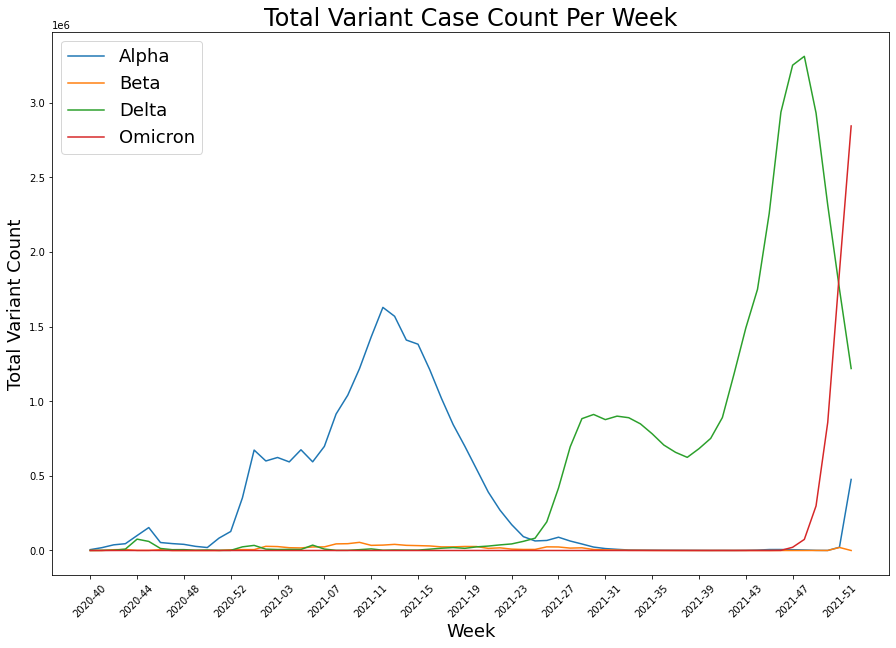

In [11]:
df = variants.groupby(by=['year_week', 'variant']).sum()
df = df.reset_index()
x = df['year_week'].unique()

plt.rcParams['figure.figsize']=(15,10)
fig, ax = plt.subplots()

ax.plot(x, df['number_cases_ratio'].loc[df['variant']=='B.1.1.7'], label='Alpha')
ax.plot(x, df['number_cases_ratio'].loc[df['variant']=='B.1.351'], label='Beta')
ax.plot(x, df['number_cases_ratio'].loc[df['variant']=='B.1.617.2'], label='Delta')
ax.plot(x, df['number_cases_ratio'].loc[df['variant']=='B.1.1.529'], label="Omicron")

ax.set(xticks=x[::4])
plt.xticks(rotation = 45)
plt.title("Total Variant Case Count Per Week", fontsize=24)
plt.xlabel("Week", fontsize=18)
plt.ylabel("Total Variant Count", fontsize=18)
plt.legend(loc='upper left', prop={'size': 18})
plt.show()

#fig = plt.get_figure()
fig.savefig('Figure_2.png')

In [12]:
variants = variants.loc[(variants['variant'] != 'B.1.351')]
variants

,country_code,year_week,new_cases,variant,percent_variant,number_cases_ratio
country,,,,,,
Austria,AT,2020-40,5597,B.1.1.529,0.0,0.000
Austria,AT,2020-40,5597,B.1.1.7,0.0,0.000
Austria,AT,2020-40,5597,B.1.617.2,0.0,0.000
Austria,AT,2020-41,7486,B.1.1.529,0.0,0.000
Austria,AT,2020-41,7486,B.1.1.7,0.0,0.000
...,...,...,...,...,...,...
Sweden,SE,2021-50,24538,B.1.617.2,68.7,16857.606
Sweden,SE,2021-51,28046,B.1.1.529,87.5,24540.250
Sweden,SE,2021-51,28046,B.1.617.2,12.5,3505.750


In [13]:
vaccinations = vaccinations.loc[vaccinations['TargetGroup'] == 'ALL']
vaccinations = vaccinations.drop_duplicates(subset='ReportingCountry')
vaccinations

,ReportingCountry,Denominator,NumberDosesReceived,NumberDosesExported,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,UnknownDose,Region,TargetGroup,Vaccine,Population
YearWeekISO,,,,,,,,,,,,,
2020-W53,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,MOD,8901064
2020-W53,BE,11522440.0,0.0,NaN,0,NaN,0,0,0,BE,ALL,JANSS,11522440
2020-W52,BG,6951482.0,10725.0,NaN,0,NaN,0,0,0,BG,ALL,COM,6951482
2020-W52,CY,888005.0,9750.0,NaN,369,NaN,0,0,0,CY,ALL,COM,888005
2020-W52,CZ,10693939.0,11700.0,0.0,1268,NaN,0,0,0,CZ,ALL,COM,10693939
2020-W52,DE,83166711.0,151125.0,0.0,24346,NaN,19,0,0,DE,ALL,COM,83166711
2020-W50,DK,5822763.0,0.0,0.0,1,NaN,0,0,0,DK,ALL,COM,5822763
2020-W52,EE,1328976.0,9750.0,0.0,191,NaN,0,0,0,EE,ALL,COM,1328976
2020-W52,EL,10718565.0,0.0,0.0,2,NaN,0,0,0,EL,ALL,MOD,10718565


In [14]:
def get_population(row, df):
    pop = df['Denominator'].loc[df['ReportingCountry'] == row['country_code']]
    return pop[0]

variants['population'] = variants.apply(lambda row: get_population(row,vaccinations), axis=1)
variants

/var/folders/j0/0b933hxd0_j8p66b657g5fb40000gn/T/ipykernel_40975/3869827783.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variants['population'] = variants.apply(lambda row: get_population(row,vaccinations), axis=1)


,country_code,year_week,new_cases,variant,percent_variant,number_cases_ratio,population
country,,,,,,,
Austria,AT,2020-40,5597,B.1.1.529,0.0,0.000,8901064.0
Austria,AT,2020-40,5597,B.1.1.7,0.0,0.000,8901064.0
Austria,AT,2020-40,5597,B.1.617.2,0.0,0.000,8901064.0
Austria,AT,2020-41,7486,B.1.1.529,0.0,0.000,8901064.0
Austria,AT,2020-41,7486,B.1.1.7,0.0,0.000,8901064.0
...,...,...,...,...,...,...,...
Sweden,SE,2021-50,24538,B.1.617.2,68.7,16857.606,870200.0
Sweden,SE,2021-51,28046,B.1.1.529,87.5,24540.250,870200.0
Sweden,SE,2021-51,28046,B.1.617.2,12.5,3505.750,870200.0


In [16]:
def normalize_counts(row):
    percentage = (row['number_cases_ratio']/row['population']) * 100
    return percentage
    
variants['normalized_counts'] = variants.apply(normalize_counts, axis=1)

variants

/var/folders/j0/0b933hxd0_j8p66b657g5fb40000gn/T/ipykernel_40975/4364157.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variants['normalized_counts'] = variants.apply(normalize_counts, axis=1)


,country_code,year_week,new_cases,variant,percent_variant,number_cases_ratio,population,normalized_counts
country,,,,,,,,
Austria,AT,2020-40,5597,B.1.1.529,0.0,0.000,8901064.0,0.000000
Austria,AT,2020-40,5597,B.1.1.7,0.0,0.000,8901064.0,0.000000
Austria,AT,2020-40,5597,B.1.617.2,0.0,0.000,8901064.0,0.000000
Austria,AT,2020-41,7486,B.1.1.529,0.0,0.000,8901064.0,0.000000
Austria,AT,2020-41,7486,B.1.1.7,0.0,0.000,8901064.0,0.000000
...,...,...,...,...,...,...,...,...
Sweden,SE,2021-50,24538,B.1.617.2,68.7,16857.606,870200.0,1.937211
Sweden,SE,2021-51,28046,B.1.1.529,87.5,24540.250,870200.0,2.820070
Sweden,SE,2021-51,28046,B.1.617.2,12.5,3505.750,870200.0,0.402867


In [17]:
variants.to_csv("data.tsv", sep="\t")